In [3]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import datasets

In [24]:
# Load Data 
iris = datasets.load_iris()
data_df = pd.DataFrame(data, columns = ["Sepal Len", "Sepal Width", "Petal Len", "Petal Width"])
target_df = pd.DataFrame(target)

In [41]:
x_values = data_df.ix[:,["Sepal Len","Petal Width"]]
# Replace values of the labels to adapt them for the SVM model
y_values = target_df.replace(to_replace = [0,2], value = [-1,1])

In [50]:
# Separate Train data and Test Data 
msk = np.random.rand(len(x_values)) < 0.8
x_train = x_values[msk]
y_train = y_values[msk]
x_test = x_values[~msk]
y_test = y_values[~msk]

In [213]:
# Start with Tensorflow 
sess = tf.Session()
# Configurate places where we put our data 
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# This is the variables we want to train 
A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.matmul(x_data, A) - b 
l2_norm = tf.reduce_sum(tf.square(A))
# margin constant for SVM
alpha = tf.constant([0.01])
#classification_term = tf.reduce_mean(tf.maximum(0., 1. - model_output))
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))
loss = classification_term + alpha*l2_norm
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target),tf.float32))
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [220]:
batch_size = 100
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(2000):
    rand_index = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train.iloc[rand_index]
    rand_y = y_train.iloc[rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)

    train_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_train,
        y_target: y_train})
    train_accuracy.append(train_acc_temp)

    test_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_test,
        y_target: y_test})
    test_accuracy.append(test_acc_temp)

    if (i + 1) % 250 == 0:
        print('Loss = ' + str(temp_loss))

Loss = [ 0.09075801]
Loss = [ 0.08971681]
Loss = [ 0.10340531]
Loss = [ 0.11985704]
Loss = [ 0.09581061]
Loss = [ 0.07999936]
Loss = [ 0.08613099]
Loss = [ 0.08755745]
Loss = [ 0.08402228]
Loss = [ 0.09266701]
Loss = [ 0.09068055]
Loss = [ 0.07872377]
Loss = [ 0.10657073]
Loss = [ 0.09652995]
Loss = [ 0.0896838]
Loss = [ 0.08320903]
Loss = [ 0.0901743]
Loss = [ 0.07487698]
Loss = [ 0.08068867]
Loss = [ 0.07123765]


In [226]:
A_value = sess.run(A)
b_value = sess.run(b)[0,0]

In [227]:
a1 = A_value[0, 0]
a2 = A_value[1, 0]

slope = -a2/a1
y_intercept = b_value/a1


In [228]:
sepal_length = x_values.loc[:, ["Sepal Len"]].values.flatten()
petal_width = x_values.loc[:, ["Petal Width"]].values.flatten()

x_line = np.arange(start=min(petal_width), stop=max(petal_width), step=0.1)
y_line = []
for i in x_line:
    y_line.append(slope*i+y_intercept)



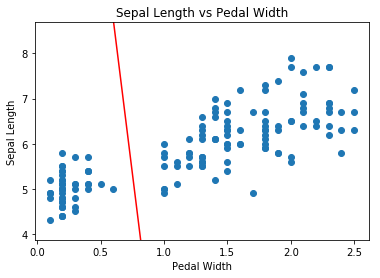

In [230]:
%matplotlib inline
# Plot data and line
plt.plot(petal_width, sepal_length, 'o')
plt.plot(x_line, y_line, 'r')
plt.title('Sepal Length vs Pedal Width')
plt.ylim([min(sepal_length)*0.9, max(sepal_length)*1.1])
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()